# Տնային առաջադրանք 3

## Տվյալների նկարագրություն

`HW3_Data.xlsx` ֆայլում ներկայացված են բանկային գործունեությանը վերաբերող ռեալիստիկ տվյալներ (գեներացված), որոնց հիման վրա անհրաժեշտ է կառուցել գրաֆիկներ և պատասխանել դրանց վերաբերող հարցերին։

## Loans_Monthly էջ
Այս էջում ներկայացված է բանկի կողմից տրված վարկերի մասին ամսական ինֆորմացիան:
- **`Date`**: Ամսաթիվ, 01-01-2024-ից մինչև 30․09․2025թ․։
- **`Given_Amount_AMD`**: Տրված վարկերի գումար՝ ՀՀ դրամով։
- **`Given_Count`**: Տրված վարկերի քանակ։
- **`Interest_Average`**: Վարկերի կշռված միջին անվանակաան տոկոսադրույք։

## Branch_KPI էջ
Այս էջում ներկայացված է բանկի մասնաճյուղերի կողմից տրամադրված վարկերի և ներգրավված ավանդների մասին ինֆորմացիան (պլանավորված և փաստացի), ինչպես նաև տոկոսային եկամուտները և ծախսերը:
- **`Branch_ID`**, **`Branch_Name`**: Մասնաճյուղի կոդը և անվանումը։
- **`Loans_Plan`**, **`Loans_Actual`**, **`Loans_KPI`**: Պլանավորված և փաստացի տրամադրված վարկերի չափ և պլանի կատարման տոկոսը։
- **`Deposits_Plan`**, **`Deposits_Actual`**, **`Deposits_KPI`**: Պլանավորված և փաստացի ներգրավված ավանդների չափ և պլանի կատարման տոկոսը։
- **`Interest_Income`**, **`Interest_Cost`**, **`Net_Interest_Income`**: Տոկոսային եկամուտ, տոկոսային ծախս և զուտ տոկոսային եկամուտ։

## ATM էջ
Այս էջում ներկայացված է բանկի բանկոմատներում առկա թղթադրամների մնացորդի մասին ինֆորմացիա՝ 15 օրվա համար՝ ժամային արտահայտությամբ:
- **`ATM_ID`**: Բանկոմատի կոդը (օր.՝ `ATM001`, `ATM002` և այլն)։
- **`DateTime`**: Ամսաթիվը և ժամը։
- **`Available_1000_AMD`**, **`Available_5000_AMD`**, **`Available_10000_AMD`**, **`Available_20000_AMD`**: 1000, 5000, 10000 և 20000 դրամանոց թղթադրամների քանակը (ուշադրություն դարձնել, որ տվյալները արտահայտում են նաև բանկոմատների լիցքավորման մասին տեղեկտվություն)։
- **`Total_Cash_AMD`**: Բանկոմատում առկա գումարը ՀՀ դրամով։

## Ներբեռնել անհրաժեշտ գրադարանները և տվյալները

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Ավարտել կոդը

loans = pd.read_excel("HW3_Data.xlsx", sheet_name="Loans_Monthly")
branches = pd.read_excel("HW3_Data.xlsx", sheet_name="Branch_KPI")
atm = pd.read_excel("HW3_Data.xlsx", sheet_name="ATM")

## Մաս 1-ին։ Վարկերի ամսական տվյալներ

In [78]:
loans.head()

,Date,Given_Amount_AMD,Given_Count,Interest_Average
0,2024-01-31,174380000,388,0.17
1,2024-02-29,128900000,348,0.16
2,2024-03-31,148720000,244,0.20
3,2024-04-30,173290000,275,0.18
4,2024-05-31,157340000,321,0.19


**Պատկերել տրված վարկերի համար հիստոգրամ։ Պարզել, արդյո՞ք այն պատկանում է որևէ հայտնի բաշխման։**

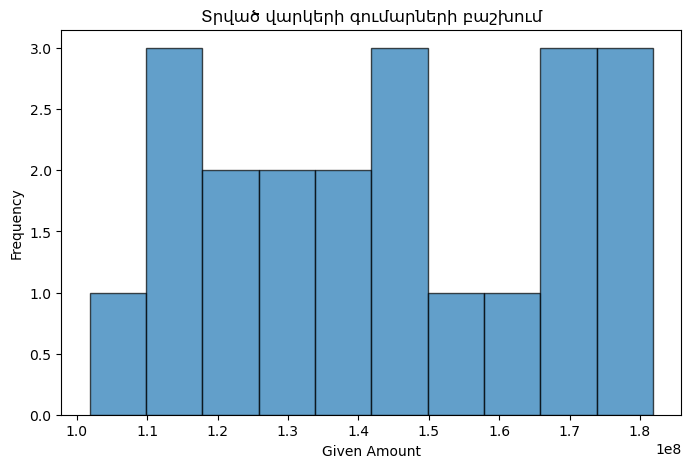

In [161]:
# Կոդը՝ այստեղ
plt.figure(figsize=(8, 5))
plt.hist(loans['Given_Amount_AMD'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Տրված վարկերի գումարների բաշխում")
plt.xlabel("Given Amount")
plt.ylabel("Frequency")
plt.show()

Այս հիստոգրամն ունի մի քանի արտահայտված գագաթներ, ինչը նշանակում է, որ բաշխումը multimodal է։Այն զանգակաձև չէ և սիմետրիկ չէ մեկ կենտրոնի շուրջ, ուրեմն չունի նորմալ բաշխում։Բաշխումը չունի հստակ ուժեղ թեքություն:Հետևաբար այս հիստոգրամի տեսքը չի պատկանում որևէ հայտնի բաշխմանը։

**Պատկերել տրված վարկերի գումարը և քանակը մեկ գրաֆիկի մեջ և ելնելով ստացված գրաֆիկից, պատասխանել, թե որ ամիսներին է 1 վարկառուի գծով միջինում ավելի մեծ գումարով վարկեր տրամադրվել։**

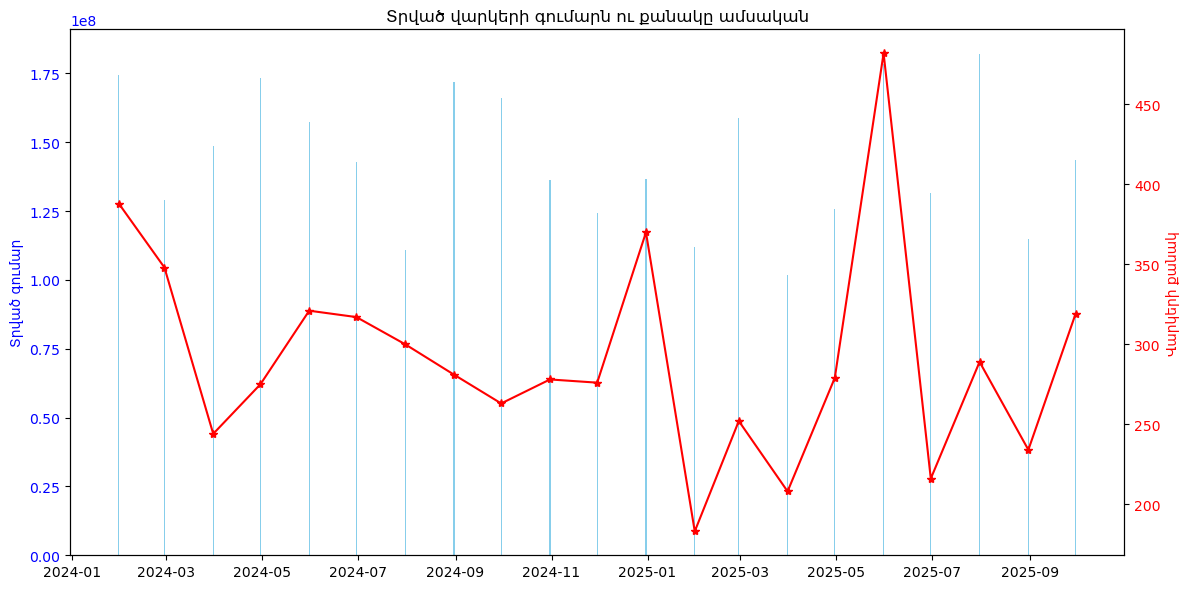

,Date,Avg
8,2024-09-30,631064.638783
13,2025-02-28,630238.095238
3,2024-04-30,630145.454545


In [87]:
# Կոդը՝ այստեղ
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(loans['Date'], loans['Given_Amount_AMD'], color='skyblue', label='Given Amount (AMD)')
ax1.set_ylabel('Տրված գումար', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(loans['Date'], loans['Given_Count'], color='red', marker='*', label='Given Count')
ax2.set_ylabel('Վարկերի քանակ', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Տրված վարկերի գումարն ու քանակը ամսական')
fig.tight_layout()
plt.show()

loans['Avg'] = loans['Given_Amount_AMD'] / loans['Given_Count']
top3 = loans.sort_values(by='Avg', ascending=False).head(3)

top3_info = top3[['Date', 'Avg']]
top3_info

**Պատասխան՝**

1 վարկառուի գծով միջինում ավելի մեծ գումարով վարկեր տրամադրվելէ 2024թ․-ի սեպտեմբեր, 2025թ․-ի փետրվար և 2024թ․-ի ապրիլ ամիսներին։

**Պատկերել տրամադրված վարկերի գումարը և դրանց միջին տոկոսադրույքը 2024 թվականի համար։ *Որպես առավելություն կդիտարկվի, եթե 2 գրաֆիկները պատկերած լինեն կողք կողքի։***

**Որքա՞ն է տրված վարկերի գումարի և տոկոսադրույքի միջինը․ ցույց տալ գրաֆիկում (օգտագործել `axhline()` ֆունկցիան)։**

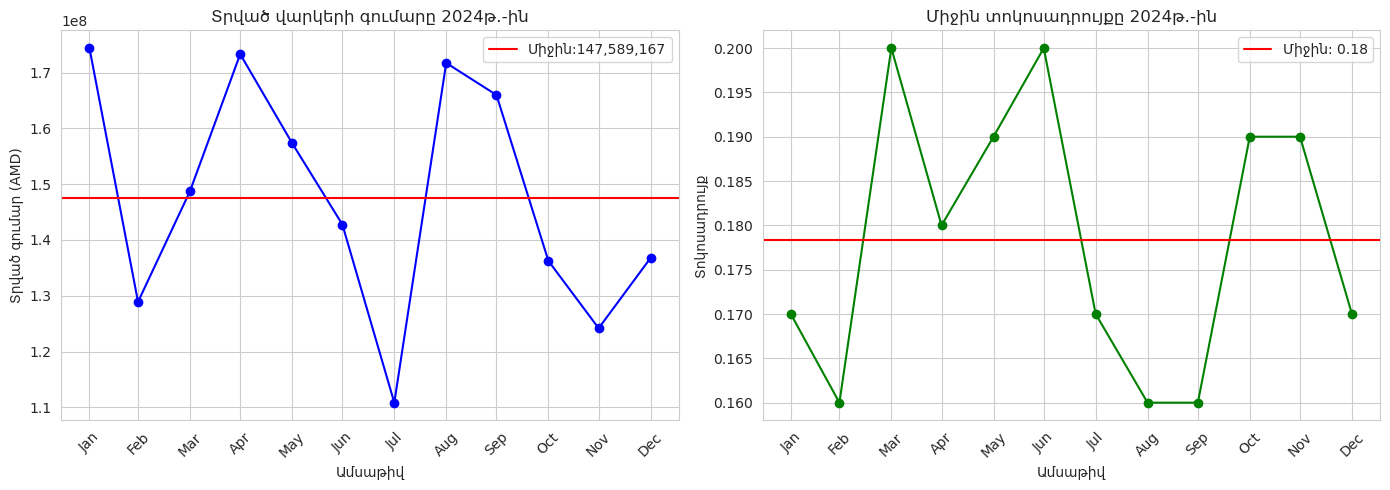

In [216]:
# Կոդը՝ այստեղ
loans_2024 = loans[loans['Date'].dt.year == 2024]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.plot(loans_2024['Date'], loans_2024['Given_Amount_AMD'], marker='o', color='blue')
mean_amount = loans_2024['Given_Amount_AMD'].mean()
ax1.axhline(mean_amount, color='red', label=f'Միջին:{mean_amount:,.0f}')
ax1.set_title('Տրված վարկերի գումարը 2024թ․-ին')
ax1.set_xlabel('Ամսաթիվ')
ax1.set_ylabel('Տրված գումար (AMD)')
ax1.legend()
ax1.grid(True)

ax2.plot(loans_2024['Date'], loans_2024['Interest_Average'], marker='o', color='green')
mean_interest = loans_2024['Interest_Average'].mean()
ax2.axhline(mean_interest, color='red', label=f'Միջին: {mean_interest:.2f}')
ax2.set_title('Միջին տոկոսադրույքը 2024թ․-ին')
ax2.set_xlabel('Ամսաթիվ')
ax2.set_ylabel('Տոկոսադրույք')
ax2.legend()
ax2.grid(True)

months = loans_2024['Date'].dt.strftime('%b')
ax1.set_xticks(loans_2024['Date'])
ax1.set_xticklabels(months, rotation=45)
ax2.set_xticks(loans_2024['Date'])
ax2.set_xticklabels(months, rotation=45)

plt.tight_layout()
plt.show()

## Մաս 2-րդ։ Մանսաճյուղեր

In [82]:
branches.head()

,Branch_ID,Branch_Name,Loans_Plan,Loans_Actual,Loans_KPI,Deposits_Plan,Deposits_Actual,Deposits_KPI,Interest_Income,Interest_Cost,Net_Interest_Income
0,12001,Kentron,120000000,132000000,1.100000,97000000,89600000,0.923711,23760000,-6720000,17040000
1,12002,Moskovyan,105000000,103500000,0.985714,89000000,89450000,1.005056,18630000,-6708750,11921250
2,12003,Baghramyn,100000000,100450000,1.004500,91000000,93100000,1.023077,18081000,-6982500,11098500
3,12004,Nalbandyan,98000000,103600000,1.057143,84000000,83200000,0.990476,18648000,-6240000,12408000
4,12005,Ajapnyaak,105000000,83300000,0.793333,95000000,110400000,1.162105,14994000,-8280000,6714000


**Բազմաթիվ կարծիքներ կան, որ pie chart-ները վիզուալիզացիայի համար վատ տարբերակ են։ Այդ պատճառով ներգրավված ավանդների համար պետք է կառուցել այնպիսի pie chart, որը կկոտրի այդ կարծրատիպը։**

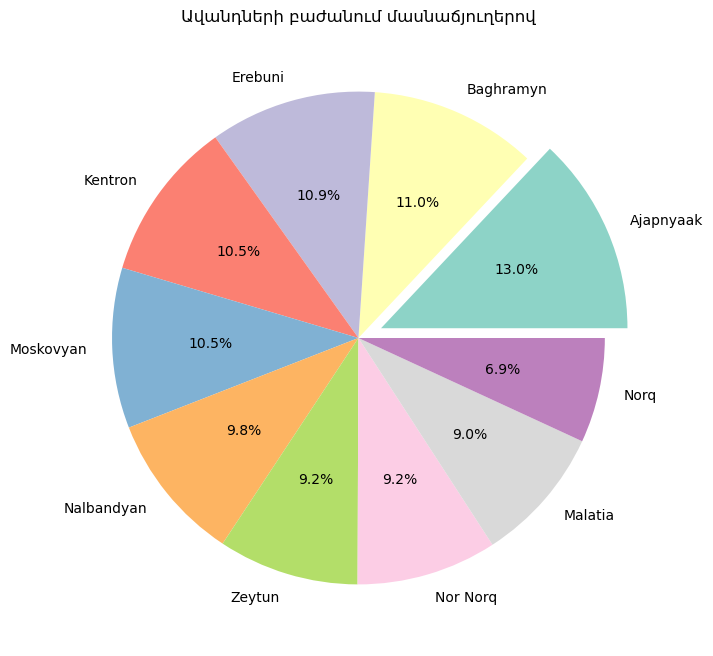

In [83]:
# Կոդը՝ այստեղ
branches_sorted = branches.sort_values(by='Deposits_Actual', ascending=False)
explode = np.where(branches_sorted['Deposits_Actual'] == branches_sorted['Deposits_Actual'].max(), 0.1, 0)

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(branches_sorted['Deposits_Actual'], labels=branches_sorted['Branch_Name'], autopct='%1.1f%%',colors=sns.color_palette('Set3'), explode=explode)

ax.set_title('Ավանդների բաժանում մասնաճյուղերով')
plt.show()

**Ըստ մասնաճյուղերի պատկերել պլանային և փաստացի վարկերի ինֆորմացիան, գրաֆիկում ցույց տալ կատարողականի տոկոսը յուրաքանչյուր մասնաճյուղի համար։**

**Որպես առավելություն կդիտարկվի, եթե տրվի այնպիսի գունավորում, որը կտարանջատի KPI-ը գերակատարած և թերակատարած մասնաճյուղերին։**

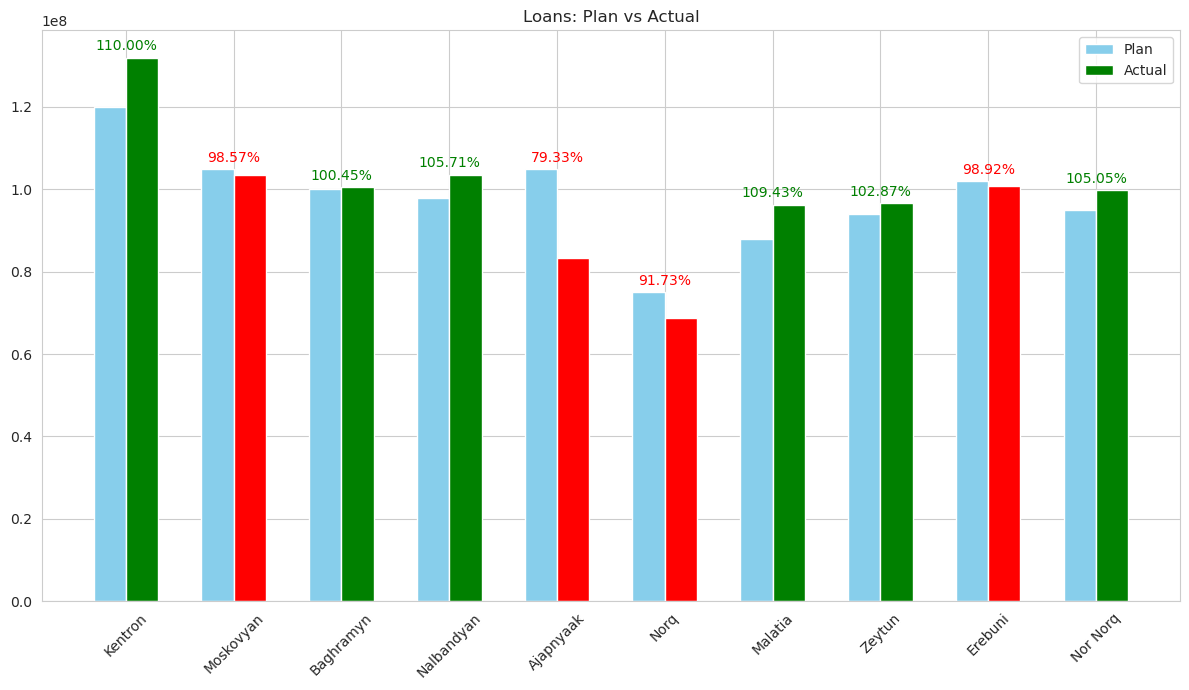

In [218]:
x = np.arange(len(branches['Branch_Name']))
colors = ['green' if k >= 1 else 'red' for k in branches['Loans_KPI']]

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(x - 0.15, branches['Loans_Plan'], width=0.3, color='skyblue', label='Plan')
ax.bar(x + 0.15, branches['Loans_Actual'], width=0.3, color=colors, label='Actual')


for i, kpi in enumerate(branches['Loans_KPI']):
    top_height = max(branches['Loans_Plan'][i], branches['Loans_Actual'][i])
    ax.text(x[i], top_height + 1000000, f'{kpi*100:.2f}%',ha='center',va='bottom',color=colors[i])  
    
ax.set_xticks(x)
ax.set_xticklabels(branches['Branch_Name'], rotation=45)

ax.set_title('Loans: Plan vs Actual')
ax.legend()

plt.tight_layout()
plt.show()

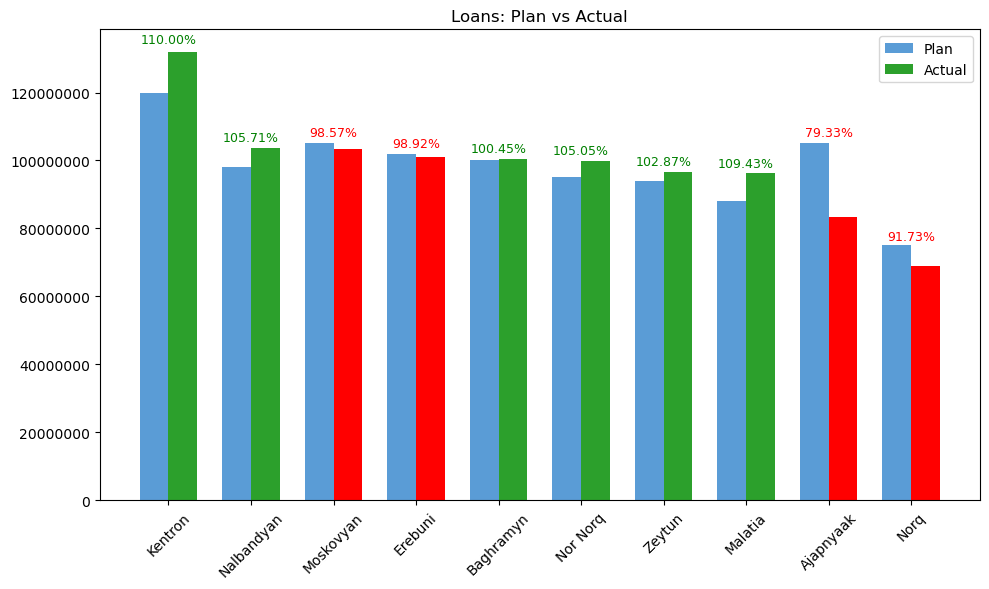

In [7]:
# Վերջնական արդյունքը ներկայացված է ստորև

**Ըստ մասնաճյուղերի պատկերել վարկերի և ավանդների փաստացի արժեքները՝ գրաֆիկի վրա ցույց տալով դրանց KPI-ի տոկոսը։**

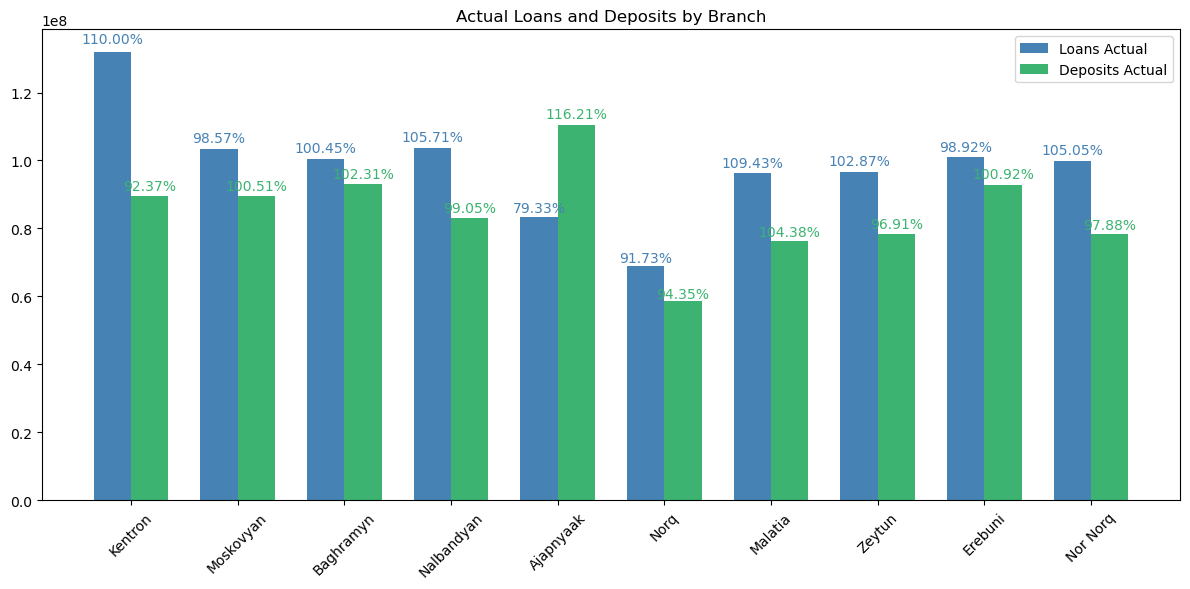

In [156]:
x = np.arange(len(branches['Branch_Name']))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width/2, branches['Loans_Actual'], width, color='steelblue', label='Loans Actual')
ax.bar(x + width/2, branches['Deposits_Actual'], width, color='mediumseagreen', label='Deposits Actual')


for i in range(len(branches)):
    ax.text(x[i] - width/2, branches['Loans_Actual'][i] * 1.02 , f"{branches['Loans_KPI'][i]*100:.2f}%",
            ha='center', color='steelblue')
    ax.text(x[i] + width/2, branches['Deposits_Actual'][i] * 1.02, f"{branches['Deposits_KPI'][i]*100:.2f}%",
            ha='center', color='mediumseagreen')

ax.set_xticks(x)
ax.set_xticklabels(branches['Branch_Name'], rotation=45)
ax.set_title('Actual Loans and Deposits by Branch')
ax.legend()

plt.tight_layout()
plt.show()

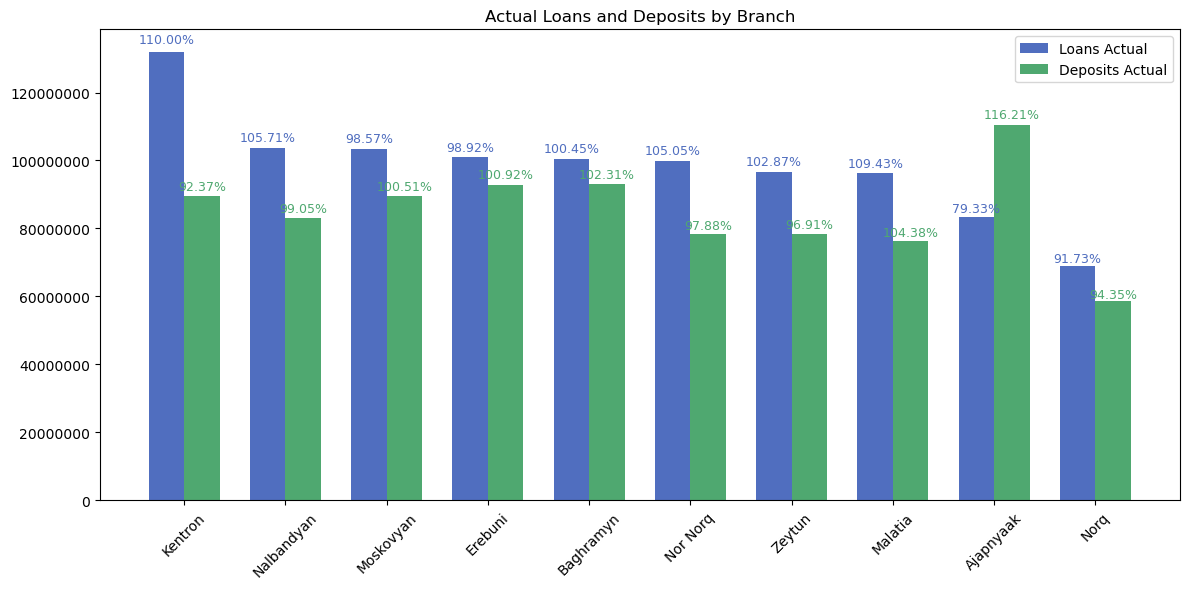

In [8]:
# Վերջնական արդյունքը ներկայացված է ստորև

**Ռեսուրսների օպտիմալացման նպատակով բանկի ղեկավարությունը քննարկում է առավել ցածր եկամտաբերություն (զուտ տոկոսային եկամուտ) և վատ կատարողականություն ունեցող մասնաճյուղերը միավորելու հարցը։** 

**Ելնելով տվյալներից մեկնաբանել՝ արդյոք կա մասնաճյուղերի միավորման անհրաժեշտություն։ Եթե ոչ՝ հիմնավորել, թե ինչու։ Եթե այո, ապա ո՞ր մասնաճյուղերը կարելի է միավորել և ինչու։**

**Հիմնավորման համար օգտագործել նախորդ գրաֆիկները, ինչպես նաև կարելի է լրացուցիչ պատկերել այլ տվյալներ։**

In [ ]:
# Կոդը՝ այստեղ

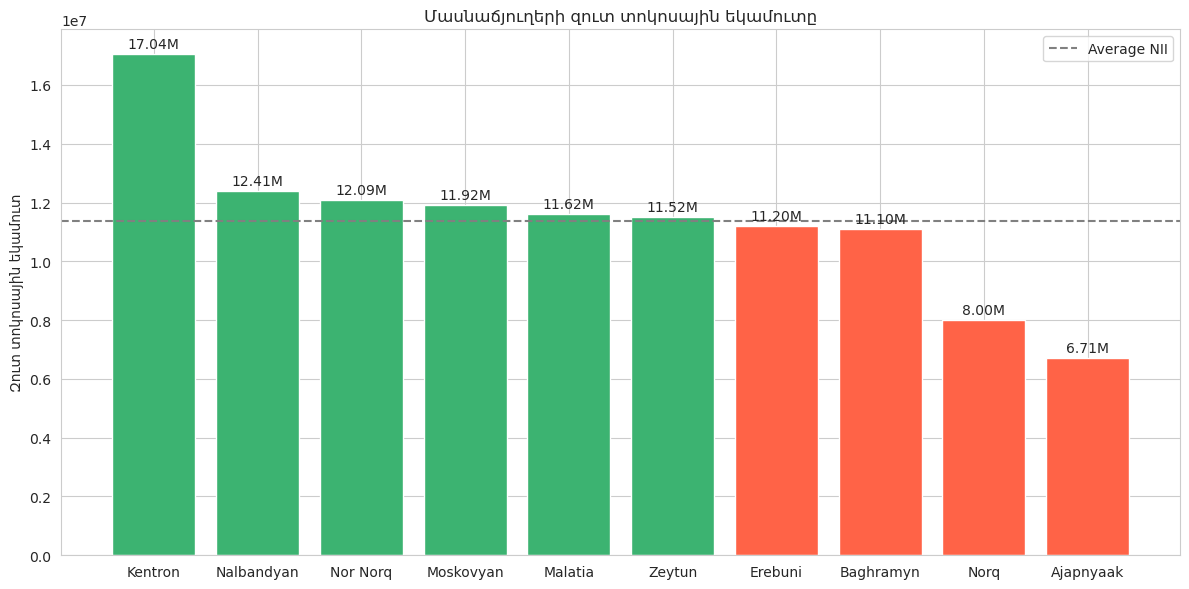

In [233]:
branches_sorted = branches.sort_values('Net_Interest_Income', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(branches_sorted['Branch_Name'], branches_sorted['Net_Interest_Income'],
              color=['mediumseagreen' if x > branches['Net_Interest_Income'].mean() else 'tomato'
                     for x in branches_sorted['Net_Interest_Income']])

ax.axhline(branches['Net_Interest_Income'].mean(), color='gray', linestyle='--', label='Average NII')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,height + 200000, f"{height/1e6:.2f}M", ha='center',fontsize=10)

ax.set_title("Մասնաճյուղերի զուտ տոկոսային եկամուտը")
ax.set_ylabel("Զուտ տոկոսային եկամուտ")
ax.legend()

plt.tight_layout()
plt.show()


**Պատասխան՝**

Միավորումը տեղին կլինի, եթե մասնաճյուղերը միաժամանակ ունեն ցածր կատարողականություն և գտնվում են մոտ տարածքներում։Ըստ ստացված գրաֆիկների՝ առավել ցածր կատարողականություն ունեն Նորքի ու Աջափնյակի մասնաճյուղերը։Սակայն նրանք տարածքային առումով հեռու են միմյանցից, և դրանց միավորումը կարող է բացասաբար անդրադառնալ՝ նվազեցնելով հաճախորդների հասանելիությունը և բարձրացնելով սպասարկման բեռը։Նշանակալի է նաև, որ Աջափնյակը ներգրավված ավանդների քանակով միանձնյա առաջատար է։Էրեբունիի և Բաղրամյանի կատարողականությունը մոտ է միջինին, ինչը, կարծում եմ, թույլ է տալիս շարունակել առանձին գործունեություն, քանի որ ընդհանուր ցուցանիշները վատը չեն։

Այսպիսով, մասնաճյուղերը միավորելու անհրաժեշտություն չկա, և խնդիրը ավելի լավ է լուծել ոչ կառուցվածքային, այլ կառավարման օպտիմալացման մակարդակում։Նորքի միավորումը Կենտրոնի հետ հնարավոր է քննարկել, քանի որ կենտրոնը ունի լավագույն կատարողականությունը և տարածքային առումով մոտ են միմյանց, բայց սա ռիսկային քայլ է և պահանջում է հավելյալ ուսումնասիրություններ։

## Մաս 3-րդ։ Բանկոմատներ

In [157]:
atm.head()

,ATM_ID,DateTime,Available_1000_AMD,Available_5000_AMD,Available_10000_AMD,Available_20000_AMD,Total_Cash_AMD
0,ATM001,2025-04-01 00:00:00,1936,1936,1936,1936,69696000
1,ATM001,2025-04-01 01:00:00,1936,1936,1936,1936,69696000
2,ATM001,2025-04-01 02:00:00,1876,1878,1886,1873,67586000
3,ATM001,2025-04-01 03:00:00,1813,1817,1845,1804,65428000
4,ATM001,2025-04-01 04:00:00,1753,1766,1784,1740,63223000


**Պատկերել 2-րդ և 8-րդ բանկոմատներում առկա 1000 և 5000 դրամանոց թղթադրամների մնացորդի մասին տվյալները։**

**Մեկնաբանել գրաֆիկները և նշել 2 բանկոմատների տարբերությունները։**

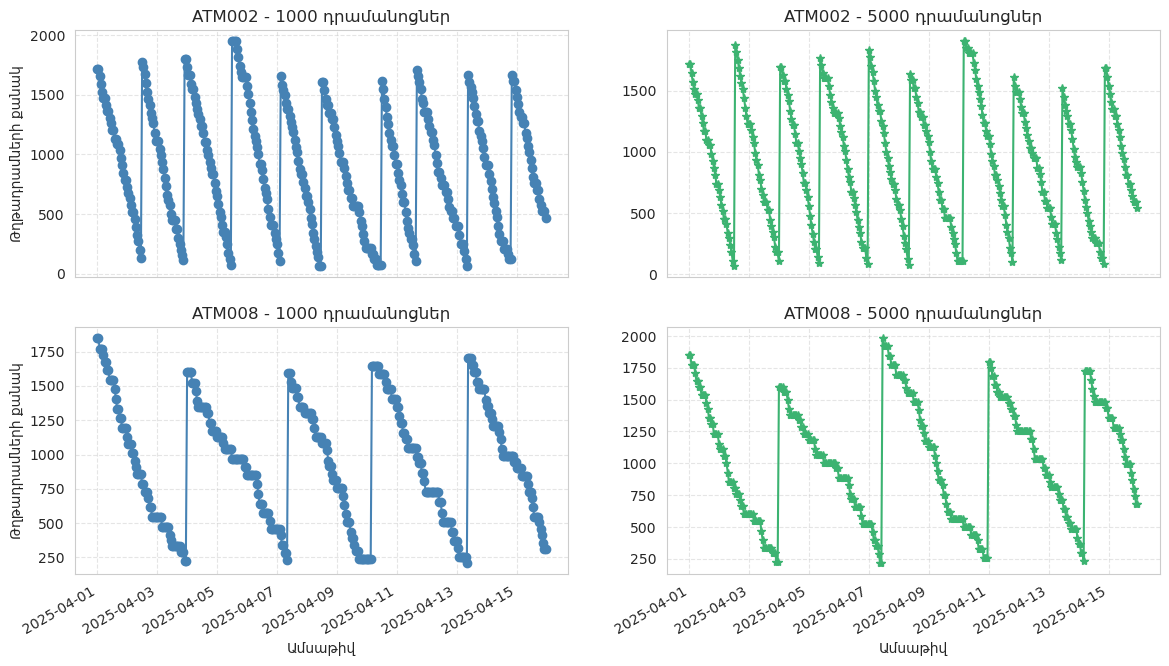

In [221]:
# Կոդը՝ այստեղ
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

atm2 = atm[atm['ATM_ID'] == 'ATM002']
axes[0, 0].plot(atm2['DateTime'], atm2['Available_1000_AMD'], color='steelblue', marker='o')
axes[0, 0].set_title('ATM002 - 1000 դրամանոցներ')
axes[0, 0].set_ylabel('Թղթադրամների քանակ')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

axes[0, 1].plot(atm2['DateTime'], atm2['Available_5000_AMD'], color='mediumseagreen', marker='*')
axes[0, 1].set_title('ATM002 - 5000 դրամանոցներ')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

atm8 = atm[atm['ATM_ID'] == 'ATM008']
axes[1, 0].plot(atm8['DateTime'], atm8['Available_1000_AMD'], color='steelblue', marker='o')
axes[1, 0].set_title('ATM008 - 1000 դրամանոցներ')
axes[1, 0].set_xlabel('Ամսաթիվ')
axes[1, 0].set_ylabel('Թղթադրամների քանակ')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

axes[1, 1].plot(atm8['DateTime'], atm8['Available_5000_AMD'], color='mediumseagreen', marker='*')
axes[1, 1].set_title('ATM008 - 5000 դրամանոցներ')
axes[1, 1].set_xlabel('Ամսաթիվ')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

fig.autofmt_xdate()
plt.show()

**Պատասխան՝**

2-րդ բանկոմատը թե 1000, թե 5000 դրամանոցների դեպքում ակնհայտորեն ավելի հաճախ է լիցքավորվել, քան 8-րդ բանկոմատը։ Մասնավորապես, 2-րդ բանկոմատը յուրաքանչյուր դեպքում լիցքավորվել է 9 անգամ, իսկ 8-րդը՝ 4։ Սա վկայում է, որ 2-րդ բանկոմատից մարդիկ ավելի հաճախ կամ ավելի մեծ գումարներ են կանխիկացնում։ Հետևաբար կարելի է ենթադրել, որ այն տեղակայված է քաղաքի ավելի ակտիվ, մարդաշատ հատվածում, կամ տարբերությունը կապված է բանկոմատներից օգտվող հաճախորդների վարքագծի առանձնահատկությունների հետ։

**Ըստ 10000 դրամանոց թղթադրամի՝ ո՞ր բանկոմատներն են առավել հաճախ լիցքավորվել, և որո՞նք՝ առավել հազվադեպ։**

**Արդյունքները հիմնավորել գրաֆիկորեն։**

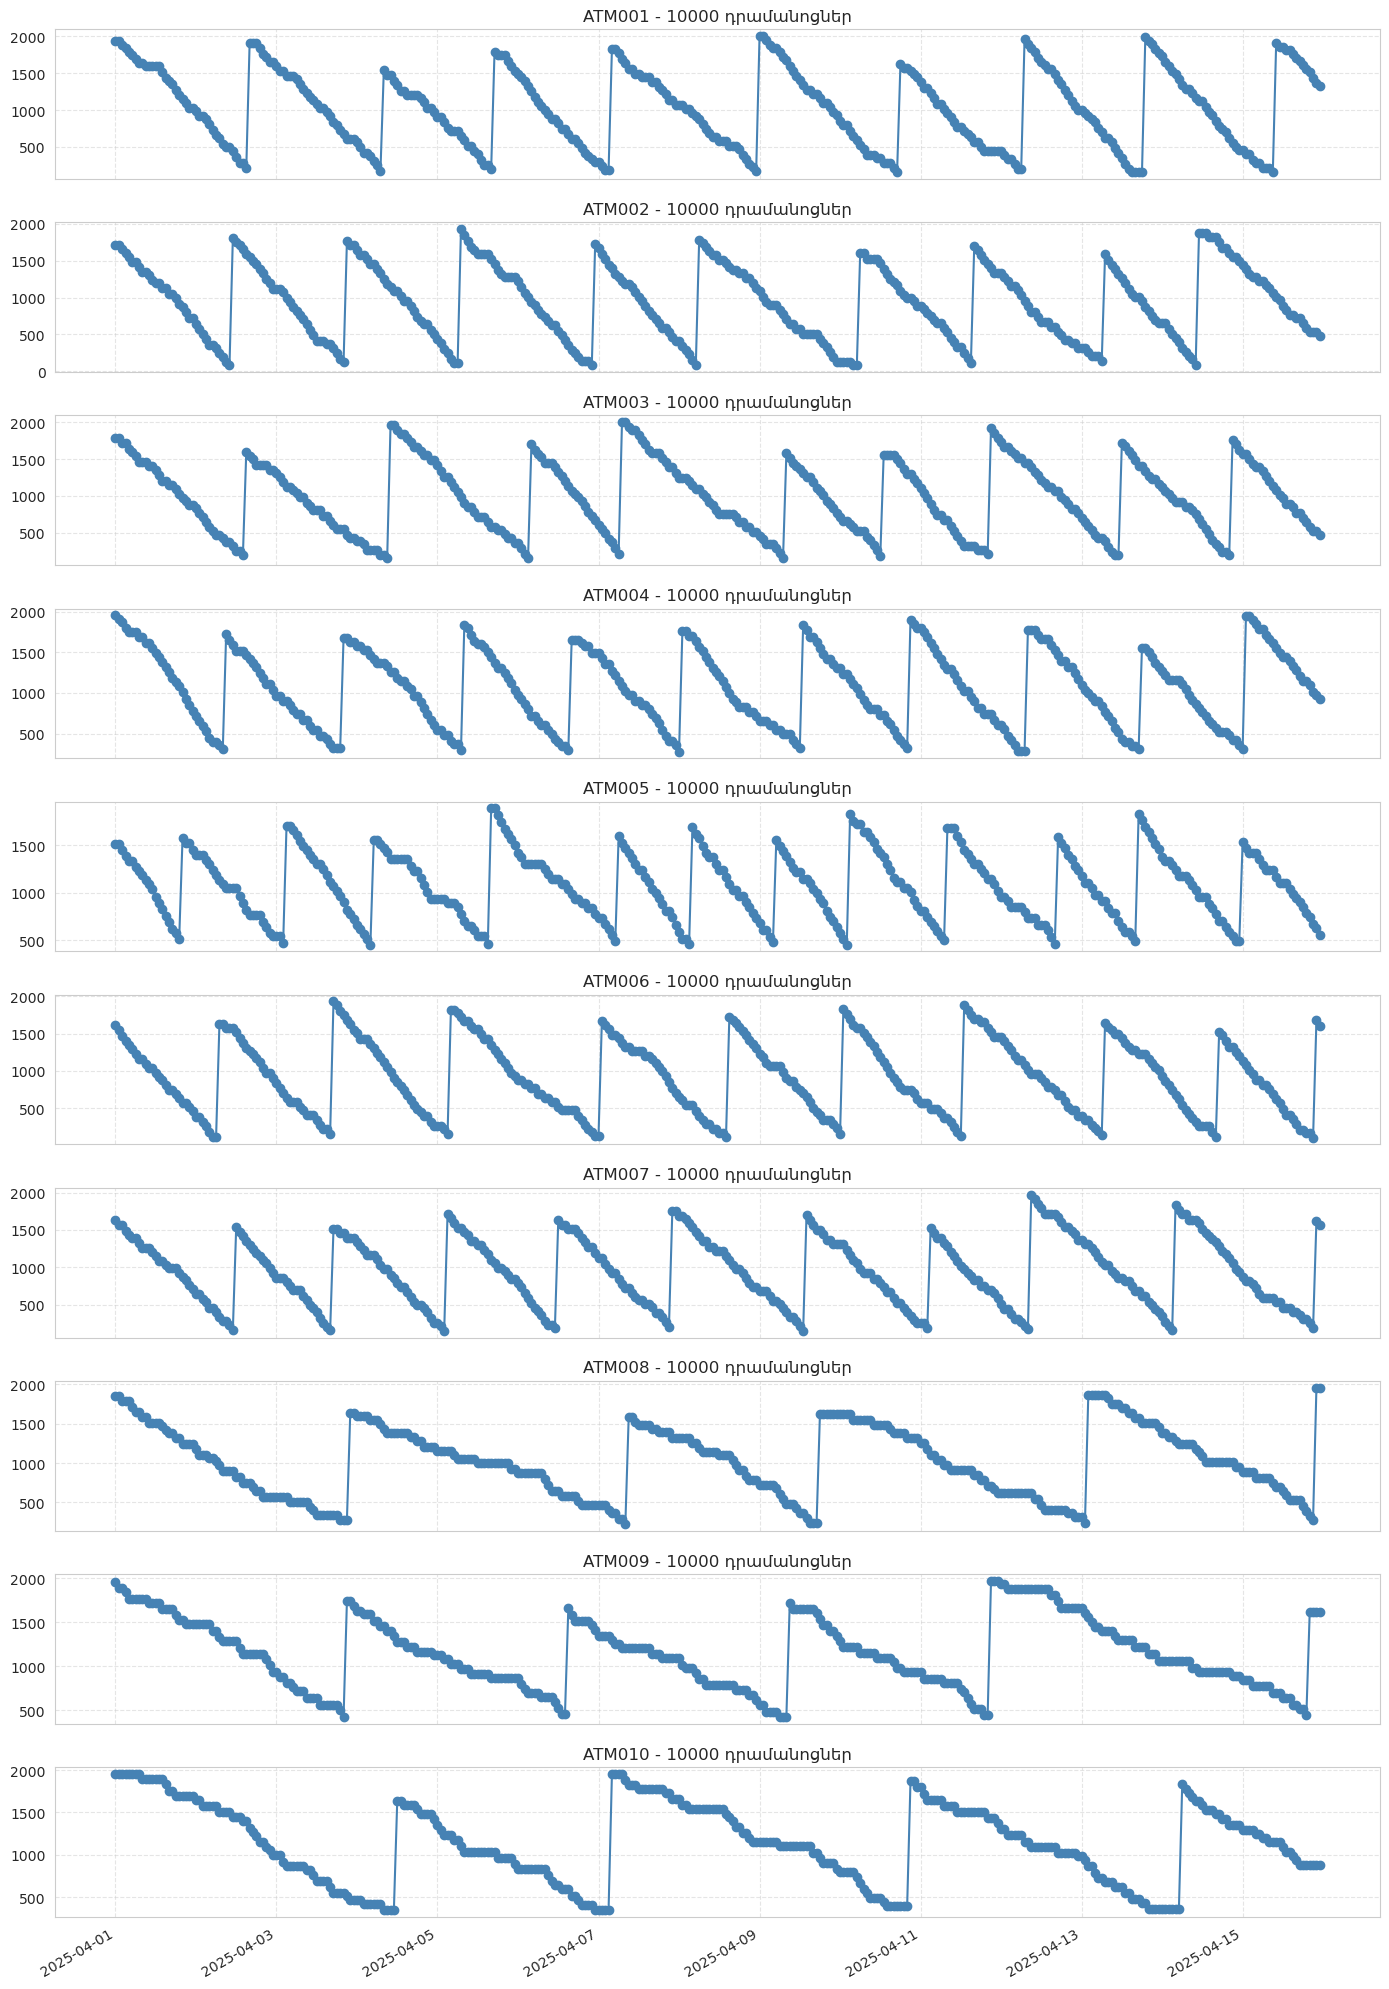

In [222]:
# Կոդը՝ այստեղ
fig, axes = plt.subplots(10, 1, figsize=(14, 20))

atm_ids = atm['ATM_ID'].unique()

for i, atm_id in enumerate(atm_ids):
    data = atm[atm['ATM_ID'] == atm_id]
    axes[i].plot(data['DateTime'], data['Available_10000_AMD'], color='steelblue', marker='o')
    axes[i].set_title(f'{atm_id} - 10000 դրամանոցներ')
    axes[i].grid(True, linestyle='--', alpha=0.5)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

**Պատասխան՝**

- Առավել հաճախ լիցքավորվել է 5-րդ բանկոմատը՝ 12 անգամ, 4-րդը, 6-րդը, 7-րդը՝ 10 անգամ։
- Առավել հազվադեպ լիցքավորվել է 10-րդ բանկոմատը՝ 4 անգամ, 8-րդը և 9-րդը՝ 5 անգամ։